In [1]:
ls

__notebook_source__.ipynb


# Spaceship Titanic Competition
## Data preprocess

In [2]:
import pandas as pd

raw_test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
raw_train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [3]:
raw_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
raw_test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


PassengerId: split as group and id  
HomePlant: to one hot  
Cryosleep: to one hot  
Cabin: split to deck, num, side, then to one hot  
Dest: one hot  
Age: value  
VIP: one hot  
RoomService, FoodCourt, Shopping Mall, Spa, VRDeck: value  
Name: drop   
Transported: label

In [5]:
passenger_ids = raw_train_df['PassengerId'].str.split('_', n=-1, expand=True)
passenger_ids

,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
8688,9276,01
8689,9278,01
8690,9279,01
8691,9280,01


In [6]:
passenger_id_values = passenger_ids.astype(int)
passenger_id_values

,0,1
0,1,1
1,2,1
2,3,1
3,3,2
4,4,1
...,...,...
8688,9276,1
8689,9278,1
8690,9279,1
8691,9280,1


In [7]:
passenger_id_values.columns = ['Group', 'Id']
# too many groups in the data, try 
# passenger_ids = passenger_id_values.astype(str)
passenger_ids = passenger_id_values

In [8]:
# same to cabin
cabins = raw_train_df['Cabin'].str.split('/', n=-1, expand=True)
cabins.columns = ['Deck', 'Num', 'Side']
cabins

,Deck,Num,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [9]:
# assemble train dataframe
columns = list(raw_train_df.columns)
columns.remove('PassengerId')
columns.remove('Cabin')
train_df = pd.DataFrame()
train_df[columns] = raw_train_df[columns]
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
train_df = pd.concat([cabins, train_df], axis=1)
train_df = pd.concat([passenger_ids, train_df], axis=1)
train_df

,Group,Id,Deck,Num,Side,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,1,B,0,P,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,2,1,F,0,S,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,3,1,A,0,S,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,2,A,0,S,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,1,F,1,S,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,1,A,98,P,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278,1,G,1499,S,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279,1,G,1500,S,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280,1,E,608,S,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
train_df.dtypes

Group             int64
Id                int64
Deck             object
Num              object
Side             object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
train_df = train_df.drop(columns=['Name'])
train_df.dtypes

Group             int64
Id                int64
Deck             object
Num              object
Side             object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [13]:
# too many values for Num, use as int
train_df['Num'] = train_df['Num'].fillna(0).astype(int)

train_df.dtypes

Group             int64
Id                int64
Deck             object
Num               int64
Side             object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [14]:
# one hot
train_df = pd.get_dummies(train_df)
train_df

,Group,Id,Num,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,1,1,0,39.0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,1,0,0,0,1,1,0
1,2,1,0,24.0,109.0,9.0,25.0,549.0,44.0,True,...,1,0,0,1,0,0,0,1,1,0
2,3,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,0,1,0,0,0,1,0,1
3,3,2,0,33.0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,0,1,0,0,0,1,1,0
4,4,1,1,16.0,303.0,70.0,151.0,565.0,2.0,True,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,1,98,41.0,0.0,6819.0,0.0,1643.0,74.0,False,...,0,1,0,1,0,1,0,0,0,1
8689,9278,1,1499,18.0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,0,1,0,1,0,1,0
8690,9279,1,1500,26.0,0.0,0.0,1872.0,1.0,0.0,True,...,1,0,0,1,0,0,0,1,1,0
8691,9280,1,608,32.0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,1,0,1,0,0,1,0


In [15]:
train_df.columns

Index(['Group', 'Id', 'Num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True'],
      dtype='object')

In [16]:
# problem: has nan in the input values
train_df.isna().sum()

Group                          0
Id                             0
Num                            0
Age                          179
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_False                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_False                      0
VIP_True                       0
dtype: int

In [17]:
# use avg for the age, 0 for others
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [18]:
train_df.isna().sum()

Group                          0
Id                             0
Num                            0
Age                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_False                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_False                      0
VIP_True                       0
dtype: int

In [19]:
train_df = train_df.fillna(0)
train_df.isna().sum()

Group                        0
Id                           0
Num                          0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_False              0
CryoSleep_True               0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
dtype: int64

In [20]:
# divide x,y 
train_x = train_df.drop(columns='Transported')
train_y = train_df['Transported']

In [21]:
# do the same with the test set, use the columns of the train set
test_p_ids = raw_test_df['PassengerId'].str.split('_', n=-1, expand=True)
test_p_ids

,0,1
0,0013,01
1,0018,01
2,0019,01
3,0021,01
4,0023,01
...,...,...
4272,9266,02
4273,9269,01
4274,9271,01
4275,9273,01


In [22]:
test_p_vals = test_p_ids.astype(int)
test_p_vals

,0,1
0,13,1
1,18,1
2,19,1
3,21,1
4,23,1
...,...,...
4272,9266,2
4273,9269,1
4274,9271,1
4275,9273,1


In [23]:
test_p_vals.columns = ['Group', 'Id']
test_p_ids = test_p_vals

In [24]:
test_cabins = raw_test_df['Cabin'].str.split('/', n=-1, expand=True)
test_cabins.columns = ['Deck', 'Num', 'Side']
test_cabins

,Deck,Num,Side
0,G,3,S
1,F,4,S
2,C,0,S
3,C,1,S
4,F,5,S
...,...,...,...
4272,G,1496,S
4273,NaN,NaN,NaN
4274,D,296,P
4275,D,297,P


In [25]:
test_df = pd.DataFrame()
test_columns = columns
test_columns.remove("Transported")
test_df[test_columns] = raw_test_df[test_columns]
test_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [26]:
test_df = pd.concat([test_cabins,test_df], axis=1)
test_df = pd.concat([test_p_ids, test_df], axis=1)
test_df

,Group,Id,Deck,Num,Side,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,13,1,G,3,S,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,18,1,F,4,S,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,19,1,C,0,S,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,21,1,C,1,S,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,23,1,F,5,S,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,2,G,1496,S,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269,1,NaN,NaN,NaN,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271,1,D,296,P,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273,1,D,297,P,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [27]:
test_df = test_df.drop(columns='Name')

In [28]:
test_df['Num'] = test_df['Num'].fillna(0).astype(int)
test_df.dtypes

Group             int64
Id                int64
Deck             object
Num               int64
Side             object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [29]:
# one hot
test_df = pd.get_dummies(test_df)
test_df

,Group,Id,Num,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_A,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,13,1,3,27.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,1,0,0,1,1,0
1,18,1,4,19.0,0.0,9.0,0.0,2823.0,0.0,0,...,1,0,0,1,0,0,0,1,1,0
2,19,1,0,31.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
3,21,1,1,38.0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,1,0,0,0,1,1,0
4,23,1,5,20.0,10.0,0.0,635.0,0.0,0.0,0,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266,2,1496,34.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,1,0,0,1,1,0
4273,9269,1,0,42.0,0.0,847.0,17.0,10.0,144.0,0,...,1,0,0,1,0,0,0,1,1,0
4274,9271,1,296,NaN,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,1,0,0,1,0
4275,9273,1,297,NaN,0.0,2680.0,0.0,0.0,523.0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
test_df.columns

Index(['Group', 'Id', 'Num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False',
       'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True'],
      dtype='object')

In [31]:
input_columns = train_x.columns
test_df = test_df[input_columns]

In [32]:
train_x = train_x.values
train_y = pd.get_dummies(train_y).values
test_x = test_df.values

## Model Defination

In [33]:
import torch
from torch.utils.data import Dataset, DataLoader

class SpaceshipDataset(Dataset):
    def __init__(self, X, y=None, train=False):
        self.X = X
        self.y = y
        self.train = train
    
    def __getitem__(self, index):
        if self.train:
            return self.X[index], self.y[index]
        else: 
            return self.X[index], 0

    def __len__(self):
        return self.X.shape[0]

In [34]:
# assemble the train set and test set
labeled_set = SpaceshipDataset(train_x, y=train_y, train=True)
test_set = SpaceshipDataset(test_x, train=False)

In [35]:
labeled_size = len(labeled_set)
labeled_size

8693

In [36]:
# train and valid one epoch, use kfold inside
from torch.utils.data.dataset import Subset

def train_valid_epoch(i, net, loss_func, kf, optimizer, labeled_set, batch_size):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    
    train_loss_list = []
    train_acc_list = []
    val_loss_list = []
    val_acc_list = []
    
    for fold, (train_index, val_index) in enumerate(kf.split(data_induce)):
        train_subset = Subset(labeled_set, train_index)
        val_subset = Subset(labeled_set, val_index)
        train_loader = DataLoader(dataset=train_subset, shuffle=True, batch_size=batch_size)
        valid_loader = DataLoader(dataset=val_subset, shuffle=True, batch_size=batch_size)
        
        # train 
        net.train()
        train_loss_sum = 0.0
        train_correct_sum = 0.0
        train_total = 0.0
        
        for step, (x, y) in enumerate(train_loader):
            x = x.to(torch.float32).to(device)
            y = y.to(torch.float32).to(device)
            optimizer.zero_grad()
            
            outputs = net(x)
            loss = loss_func(outputs, y)
            
            # backward
            loss.backward()
            optimizer.step()
            
            # acc
            preds = torch.argmax(outputs, dim=1)
            truths = torch.argmax(y, dim=1)
            correct_count = (preds == truths).sum().item()
            
            train_loss_sum += loss.item()
            train_correct_sum += correct_count
            train_total += x.shape[0]
            
        # validate
        net.eval()
        val_loss_sum = 0.0
        val_correct_sum = 0.0
        val_total = 0.0
        
        for step, (x, y) in enumerate(valid_loader):
            with torch.no_grad():
                x = x.to(torch.float32).to(device)
                y = y.to(torch.float32).to(device)
                outputs = net(x)
                loss = loss_func(outputs, y)
                
#                 print(x)
#                 print(outputs, y)
#                 print(loss.item())
                
                preds = torch.argmax(outputs, dim=1)
                truths = torch.argmax(y, dim=1)
                correct_count = (preds == truths).sum().item()
                
                val_loss_sum += loss.item()
                val_correct_sum += correct_count
                val_total += x.shape[0]
        
        # print result
        train_acc = train_correct_sum / train_total
        val_acc = val_correct_sum / val_total
        train_loss = train_loss_sum / len(train_loader)
        val_loss = val_loss_sum / len(valid_loader)
        
        if (i+1) % 10 == 0:
            print("Epoch " + str(i) + " Fold " + str(fold) + " : train loss = " + str(train_loss) + 
                 " train_acc = " + str(train_acc) + "  val_loss = " + str(val_loss) + 
                 " val_acc = " + str(val_acc))
        
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)    
    
    return train_loss_list, train_acc_list, val_loss_list, val_acc_list

In [37]:
# plot the results
%matplotlib inline
import matplotlib.pyplot as plt

def figure(train_loss, train_acc, val_loss, val_acc):
    steps = range(len(train_loss))
    plt.figure(figsize=(16,8))
    
    plt.subplot(1,2,1)
    plt.plot(steps, train_loss, color='r', label='train loss')
    plt.plot(steps, val_loss, color='b', label='val loss')
    
    # set title
    plt.title('loss')
    plt.xlabel('steps')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(steps, train_acc, color='r', label='train acc')
    plt.plot(steps, val_acc, color='b', label='val acc')
    
    # set title
    plt.title('acc')
    plt.xlabel('steps')
    plt.legend()
    
    plt.show()
    

In [38]:
# use sklearn to do k fold
from sklearn.model_selection import KFold
import numpy as np
from torch.optim import Adam
import torch.nn as nn

data_induce = np.arange(0, labeled_size)
kf = KFold(n_splits=5)

def train(net, labeled_set, epochs=10, lr=0.001, batch_size=64, wd=1e-6):
    optimizer = Adam(net.parameters(), lr=lr, weight_decay=wd)
    loss_func = nn.CrossEntropyLoss()
    labeled_size = len(labeled_set)
    data_induce = np.arange(0, labeled_size)
    kf = KFold(n_splits=5)
    
    train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
    
    for i in range(epochs):
        tl, ta, vl, va = train_valid_epoch(i, net, loss_func, kf, optimizer, labeled_set, batch_size)
        train_loss_list.extend(tl)
        train_acc_list.extend(ta)
        val_loss_list.extend(vl)
        val_acc_list.extend(va)
        
    # plot
    figure(train_loss_list, train_acc_list, val_loss_list, val_acc_list)
    

In [39]:
# define net

from torch.nn import Module

class SpaceshipMLP(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SpaceshipMLP, self).__init__()
        self.net = nn.Sequential(
            nn.BatchNorm1d(input_size),
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, hidden_size // 2),
            nn.ReLU(),
            nn.Linear(hidden_size // 2, output_size)
        )
    
    def forward(self, x):
        return self.net(x)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# net = SpaceshipMLP(train_x.shape[1], 64, 2).to(device)

Epoch 9 Fold 0 : train loss = 0.6709306878702981 train_acc = 0.7318090307736554  val_loss = 0.6730282306671143 val_acc = 0.7153536515238643
Epoch 9 Fold 1 : train loss = 0.6708081449781146 train_acc = 0.7283577796951395  val_loss = 0.6708128303289413 val_acc = 0.7395054629097182
Epoch 9 Fold 2 : train loss = 0.6700809385095324 train_acc = 0.7349726775956285  val_loss = 0.6705268770456314 val_acc = 0.7245543415756182
Epoch 9 Fold 3 : train loss = 0.6694679856300354 train_acc = 0.7329978432782172  val_loss = 0.6698503941297531 val_acc = 0.7255466052934407
Epoch 9 Fold 4 : train loss = 0.6697736382484436 train_acc = 0.723508267433501  val_loss = 0.6671088486909866 val_acc = 0.7255466052934407
Epoch 19 Fold 0 : train loss = 0.6290127720151629 train_acc = 0.7486338797814208  val_loss = 0.6368470937013626 val_acc = 0.7389304197814837
Epoch 19 Fold 1 : train loss = 0.6283371193068368 train_acc = 0.7463330457290768  val_loss = 0.6334258168935776 val_acc = 0.7498562392179413
Epoch 19 Fold 2 : t

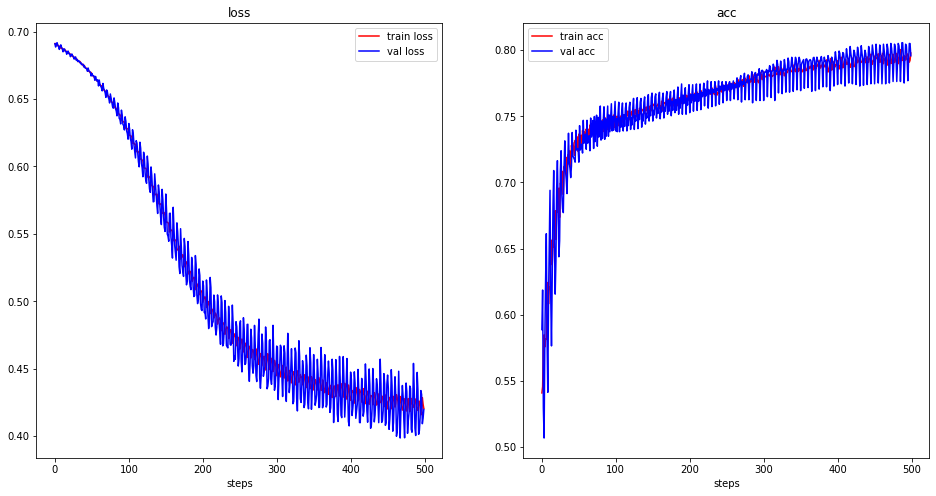

In [40]:
# train the net
net = SpaceshipMLP(train_x.shape[1], 64, 2).to(device)
train(net, labeled_set, epochs=100, lr=1e-5, batch_size=512, wd=1e-6)

In [41]:
# submission
preds = []
test_set = SpaceshipDataset(test_x, y=None, train=False)
test_loader = DataLoader(dataset=test_set, shuffle=False, batch_size=64)

for i, (data, _) in enumerate(test_loader):
    net.eval()
    with torch.no_grad(): 
        data = data.to(torch.float32).to(device)
        outs = net(data)
        pred = torch.argmax(outs, dim=1)
        preds.extend(pred.tolist())

len(preds)

4277

In [42]:
raw_test_df['PassengerId'].count()

4277

In [50]:
transported = []
for pred in preds:
    if pred:
        transported.append('True')
    else:
        transported.append('False')

In [53]:
commit = pd.DataFrame()
commit['PassengerId'] = raw_test_df['PassengerId']
commit['Transported'] = transported
commit.to_csv('submission.csv', index=False)

In [52]:
commit_file = pd.read_csv('/kaggle/working/submission.csv')
commit_file

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,False
4275,9273_01,False
